# PHYS 434 Lab 2 - Angela Zhou

In [1]:
# import the libraries
%matplotlib inline
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
from matplotlib.pyplot import xticks
import scipy
from scipy import stats
from scipy.stats import poisson
from scipy.stats import rayleigh

## Problem 1

### To set up the problem, assume in 1 day the average cosmic-ray background is some number X (pick someting btwn 0.5 and 10, with different values for you and your lab partner); and the average number of gamma-rays emitted by your hypothetical source is Y (pick something larger than X). <br>
The X value I picked is 0.9, and the Y value I picked is 19.

### A) Show how the probability distribution of the background changes as you integrate (sum) for more days.

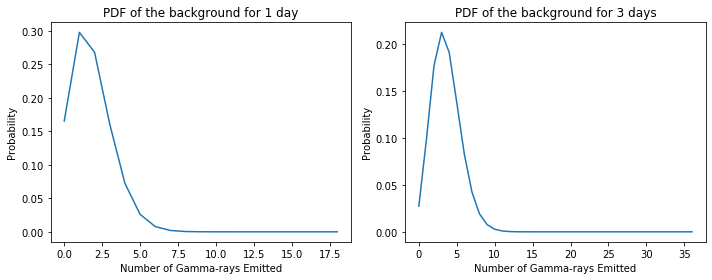

In [2]:
x = 0.9
y = 21

xAxis = range(0, 10)

# create a Possion distribution of 1000 points using scipy
background = poisson.rvs(x, size = 1000) 
# calculate the pmf for the poisson distribution
pmf1_1day = poisson.pmf(xAxis, x)
pmf2_1day = poisson.pmf(xAxis, x)
# convolve the pmf for one day
pmf_dist_1day = np.convolve(pmf1_1day, pmf2_1day)
pmf1_1day = pmf_dist_1day

# calculate the pmf for the poisson distribution
pmf1_3days = poisson.pmf(xAxis, x)
pmf2_3days = poisson.pmf(xAxis, x)
# convolve the pmf for 3 days
days = 3
for i in range(0, days):
    pmf_dist_3days = np.convolve(pmf1_3days, pmf2_3days)
    pmf1_3days = pmf_dist_3days

    
# create a figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# plot the pdf of the backgrond for 1 day
ax[0].plot(pmf_dist_1day);
ax[0].title.set_text("PDF of the background for 1 day");
ax[0].set_xlabel("Number of Gamma-rays Emitted");
ax[0].set_ylabel("Probability");

ax[1].plot(pmf_dist_3days);
ax[1].title.set_text("PDF of the background for 3 days");
ax[1].set_xlabel("Number of Gamma-rays Emitted");
ax[1].set_ylabel("Probability");

plt.tight_layout() # minimize the overlap between 2 subplots

From the two plots above, we can see the probability distribution of the background changes as I integrate for more days.

### B) Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.

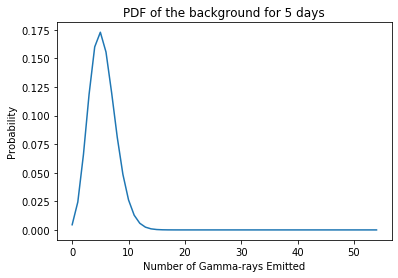

In [3]:
# calculate the pmf for the poisson distribution
pmf1_5days = poisson.pmf(xAxis, x)
pmf2_5days = poisson.pmf(xAxis, x)
# convolve the pmf for 5 days
days = 5
for i in range(0, days):
    pmf_dist_5days = np.convolve(pmf1_5days, pmf2_5days)
    pmf1_5days = pmf_dist_5days
plt.plot(pmf_dist_5days);
plt.title("PDF of the background for 5 days");
plt.xlabel("Number of Gamma-rays Emitted");
plt.ylabel("Probability");

From the plot above, we can see that when I integrate for 5 days, the summed probability distribution is still a Poisson distribution. Compared to the two plots above (the probability distribution for one day and the summed probability distribution for three days), we can see that the mean shifts to the right as we sum more days.

### C) Show how the probability distribution evolves as you average days. Calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger. Discuss this in relation to both B) and the central limit theoem.

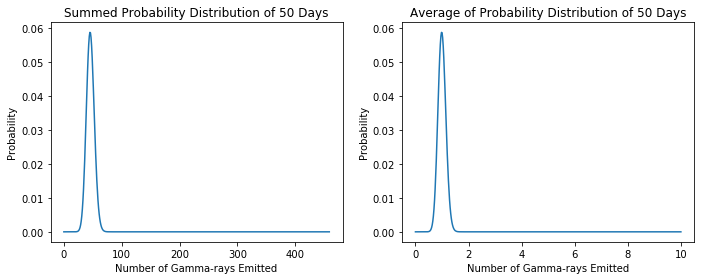

In [4]:
xmin = 0
xmax = 10
step = 0.1
xAxis = range(xmin,xmax)


## average over 50 days
days = 50
# first calculate the pmf for the poisson distribution
pmf1_50days = poisson.pmf(xAxis, x)
pmf2_50days = poisson.pmf(xAxis, x)
# then convolve the pmf for 50 days
for i in range(0, days):
    pmf_dist_50days = np.convolve(pmf1_50days, pmf2_50days)
    pmf1_50days = pmf_dist_50days
# average the result of convolution by the convolved times -> rescale x axis
x_avg50 = np.linspace(xmin,xmax,pmf1_50days.size)
# x_avg50 = np.empty(0)
# for i in range(pmf1_50days.size):
#     x_avg50 = np.append(x_avg50, i/days)

## plot the summed distribution and the averaged one
# create a figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
# plot the summed probability distribution of 50 days
ax[0].plot(pmf_dist_50days);
ax[0].title.set_text("Summed Probability Distribution of 50 Days");
ax[0].set_xlabel("Number of Gamma-rays Emitted");
ax[0].set_ylabel("Probability");
# left, right = plt.xlim()

# plot the average
ax[1].plot(x_avg50, pmf_dist_50days);
ax[1].title.set_text("Average of Probability Distribution of 50 Days")
ax[1].set_xlabel("Number of Gamma-rays Emitted");
ax[1].set_ylabel("Probability");

plt.tight_layout() # minimize the overlap between 2 subplots

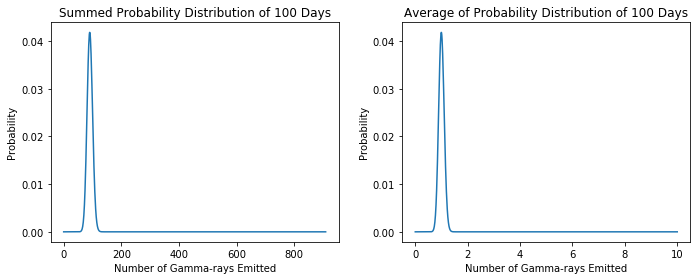

In [5]:
## average over 100 days
days = 100
# first calculate the pmf for the poisson distribution
pmf1_100days = poisson.pmf(xAxis, x)
pmf2_100days = poisson.pmf(xAxis, x)
# then convolve the pmf for 50 days
for i in range(0, days):
    pmf_dist_100days = np.convolve(pmf1_100days, pmf2_100days)
    pmf1_100days = pmf_dist_100days
# average the result of convolution by the convolved times -> rescale x axis
x_avg100 = np.linspace(xmin,xmax,pmf1_100days.size)

## plot the summed distribution and the averaged one
# create a figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
# plot the summed probability distribution of 50 days
ax[0].plot(pmf_dist_100days);
ax[0].title.set_text("Summed Probability Distribution of 100 Days");
ax[0].set_xlabel("Number of Gamma-rays Emitted");
ax[0].set_ylabel("Probability");
# left, right = plt.xlim()

# plot the average
ax[1].plot(x_avg100, pmf_dist_100days);
ax[1].title.set_text("Average of Probability Distribution of 100 Days")
ax[1].set_xlabel("Number of Gamma-rays Emitted");
ax[1].set_ylabel("Probability");

plt.tight_layout() # minimize the overlap between 2 subplots

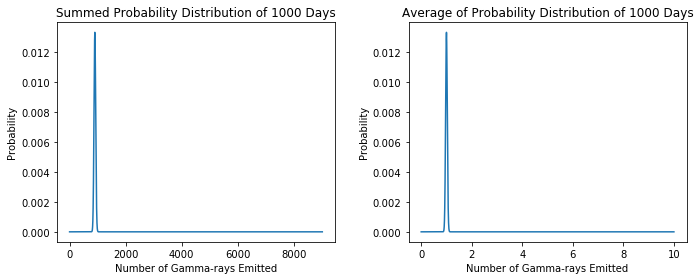

In [6]:
## average over 1000 days
days = 1000
# first calculate the pmf for the poisson distribution
pmf1_1000days = poisson.pmf(xAxis, x)
pmf2_1000days = poisson.pmf(xAxis, x)
# then convolve the pmf for 1000 days
for i in range(0, days):
    pmf_dist_1000days = np.convolve(pmf1_1000days, pmf2_1000days)
    pmf1_1000days = pmf_dist_1000days
# average the result of convolution by the convolved times -> rescale x axis
x_avg1000 = np.linspace(xmin,xmax,pmf1_1000days.size)

## plot the summed distribution and the averaged one
# create a figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
# plot the summed probability distribution of 50 days
ax[0].plot(pmf_dist_1000days);
ax[0].title.set_text("Summed Probability Distribution of 1000 Days");
ax[0].set_xlabel("Number of Gamma-rays Emitted");
ax[0].set_ylabel("Probability");
# left, right = plt.xlim()

# plot the average
ax[1].plot(x_avg1000, pmf_dist_1000days);
ax[1].title.set_text("Average of Probability Distribution of 1000 Days")
ax[1].set_xlabel("Number of Gamma-rays Emitted");
ax[1].set_ylabel("Probability");

plt.tight_layout() # minimize the overlap between 2 subplots

In this part of the lab, I averaged over 50, 100, and 1000 days. <br>
From the six plots above, we can see that the more days we average, the narrower the peak of the distribution gets, and the more it will look like a Gaussian distribution. <br>
The central limit theorem says that for a distribution with mean and standard deviation, if we take sufficiently large number of random samples, then the distribution of the sample average will approximately be a normal distribution. <br>
In part (B), the probability distribution still looks like a Poisson distribution because 5 is not a sufficiently large number of times for the distribution to evolve to Gaussian. <br>
Our plots above illustrate the central limit theorem very well.

### D) Pick some number of days N, and assume you saw Y*N gamma rays from your source. Calculate the 'sigma' of your observation. [In reality the number of gamma-rays seen from a source will also fluctuate, but we're going to ignore that complication for a couple of labs.]

I pick my numer of days N to be 100 for this part of the lab.<br>
The Y value I picked earlier is 21, therefore, I am assuming I see 21*100 = 2100 gamma rays from the source. And in the following cells, I will calculate the sigma of this observation.

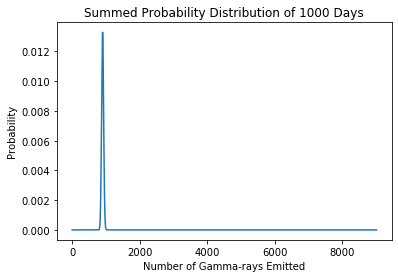

In [7]:
y = 21
N = 100

## Calculate the sigma of this observation
# first get the summed probability distribution for N days
## average over 1000 days
days = 1000
# first calculate the pmf for the poisson distribution
pmf1_1000days = poisson.pmf(xAxis, x)
pmf2_1000days = poisson.pmf(xAxis, x)
# then convolve the pmf for 1000 days
for i in range(0, days):
    pmf_dist_1000days = np.convolve(pmf1_1000days, pmf2_1000days)
    pmf1_1000days = pmf_dist_1000days
# average the result of convolution by the convolved times -> rescale x axis
x_avg1000 = np.linspace(xmin,xmax,pmf1_1000days.size)

## plot the summed distribution and the averaged one
# create a figure with 2 subplots
fig, ax = plt.subplots(1,1)
# plot the summed probability distribution of 50 days
ax.plot(pmf_dist_1000days);
ax.title.set_text("Summed Probability Distribution of 1000 Days");
ax.set_xlabel("Number of Gamma-rays Emitted");
ax.set_ylabel("Probability");

The plot above is the summed probability distributionof 1000 days. <br>
In order to calculate the sigma of my observation, we need to first find the probability that the data produces a signal that is equally or more signal-like than what I observed, which is Y*N = 2100 gamma rays. From the plot above, we can see that 2100 gamma rays is to the right of the peak of this distribution, therefore, to get the probability we want, we need to integrate from 2100 to positive infinity.<br>
The cell below performs this operation numerically. 

In [46]:
## Calculate the probability that the data produces a signal that is equally or more signal-like than what I observed, which is Y*N = 2100 gamma rays
# integrate the distribution from 2100 to positive infinity
p_2100 = np.trapz(pmf_dist_1000days)
print(p_2100)

0.9999574388098593


## Problem 2

### Pick a skewed continuous distribtuion, such as a Rayleigh, that describes your background over some observing interval.

I pick the Rayleigh distribution to describe my background over some observing interval.

### A) Show how the distribution changes as you average over more observing intervals.

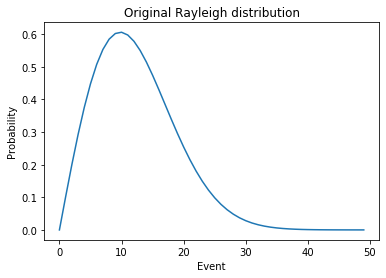

In [9]:
# first create a Rayleigh distribution
r = rayleigh.rvs(size = 50) 

# plot the original distribution
fig, ax = plt.subplots(1, 1) # create a figure
x = np.linspace(0,5,50) # create an array for x values with numpy that contains equally spaced 1000 points between -0.5 and 5
ax.plot(rayleigh.pdf(x)) 
ax.set_xlabel("Event")
ax.set_ylabel("Probability")
ax.title.set_text("Original Rayleigh distribution")
plt.show()

The plot above is my original Rayleigh distribution. <br>
In the cells below, I will average over more observing intervals(10, 50, 100) and see how the distribution changes. 

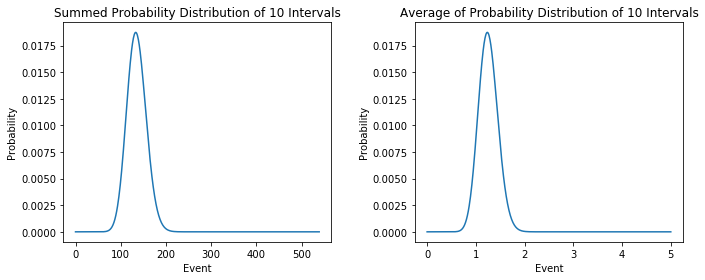

In [10]:
# average over 10 intervals
intervals = 10
x = np.linspace(0,5,50)

# first calculate the pdf for the Rayleigh distribution
r1_10 = rayleigh.pdf(x)
r2_10 = rayleigh.pdf(x)
# then convolve the pdf 10 times
for i in range(0, intervals):
    pdf_dist_10 = np.convolve(r1_10, r2_10)
    r1_10 = pdf_dist_10
# normalize the pdf
pdf_sum10 = pdf_dist_10/pdf_dist_10.sum()
# average the result of convolution by the convolved times -> rescale x axis
x_avg10 = np.linspace(0,5,pdf_sum10.size)

## plot the summed distribution and the averaged one
# create a figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
# plot the summed probability distribution of 50 days
ax[0].plot(pdf_sum10);
ax[0].title.set_text("Summed Probability Distribution of 10 Intervals");
ax[0].set_xlabel("Event");
ax[0].set_ylabel("Probability");

# plot the average
ax[1].plot(x_avg10, pdf_sum10);
ax[1].title.set_text("Average of Probability Distribution of 10 Intervals")
ax[1].set_xlabel("Event");
ax[1].set_ylabel("Probability");

plt.tight_layout() # minimize the overlap between 2 subplots

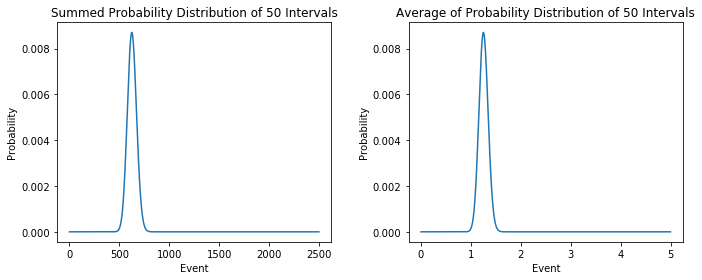

In [11]:
# average over 50 intervals
intervals = 50
x = np.linspace(0,5,50)

# first calculate the pdf for the Rayleigh distribution
r1_50 = rayleigh.pdf(x)
r2_50 = rayleigh.pdf(x)
# then convolve the pdf 50 times
for i in range(0, intervals):
    pdf_dist_50 = np.convolve(r1_50, r2_50)
    r1_50 = pdf_dist_50
# normalize the pdf
pdf_sum50 = pdf_dist_50/pdf_dist_50.sum()
# average the result of convolution by the convolved times -> rescale x axis
x_avg50 = np.linspace(0,5,pdf_sum50.size)

## plot the summed distribution and the averaged one
# create a figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
# plot the summed probability distribution of 50 days
ax[0].plot(pdf_sum50);
ax[0].title.set_text("Summed Probability Distribution of 50 Intervals");
ax[0].set_xlabel("Event");
ax[0].set_ylabel("Probability");

# plot the average
ax[1].plot(x_avg50, pdf_sum50);
ax[1].title.set_text("Average of Probability Distribution of 50 Intervals")
ax[1].set_xlabel("Event");
ax[1].set_ylabel("Probability");

plt.tight_layout() # minimize the overlap between 2 subplots

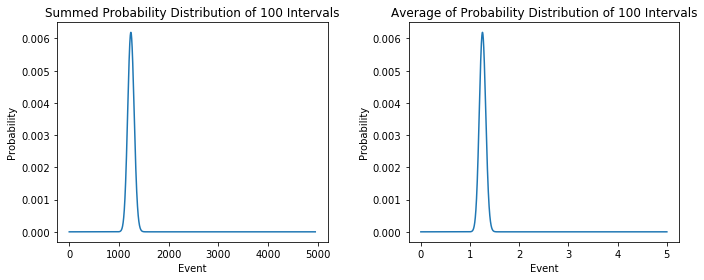

In [12]:
# average over 100 intervals
intervals = 100
x = np.linspace(0,5,50)

# first calculate the pdf for the Rayleigh distribution
r1_100 = rayleigh.pdf(x)
r2_100 = rayleigh.pdf(x)
# then convolve the pdf 100 times
for i in range(0, intervals):
    pdf_dist_100 = np.convolve(r1_100, r2_100)
    r1_100 = pdf_dist_100
# normalize the pdf
pdf_sum100 = pdf_dist_100/pdf_dist_100.sum()
# average the result of convolution by the convolved times -> rescale x axis
x_avg100 = np.linspace(0,5,pdf_sum100.size)

## plot the summed distribution and the averaged one
# create a figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
# plot the summed probability distribution of 100 days
ax[0].plot(pdf_sum100);
ax[0].title.set_text("Summed Probability Distribution of 100 Intervals");
ax[0].set_xlabel("Event");
ax[0].set_ylabel("Probability");

# plot the average
ax[1].plot(x_avg100, pdf_sum100);
ax[1].title.set_text("Average of Probability Distribution of 100 Intervals")
ax[1].set_xlabel("Event");
ax[1].set_ylabel("Probability");

plt.tight_layout() # minimize the overlap between 2 subplots

### B) Discuss how the shape changes. Does it approach a Gaussian distribution? If yes, after how many intervals?

I have averaged over 10, 50, and 100 intervals, and from the plots above we can see that as we average over more and more intervals, the mean of the distribution shifts to the right and the distribution looks more and more like a Gaussian distribution.

## Problem 3
### Version 1
### A) From looking at all the other pixels in your image, you can measure the width of the background Gaussian distribution X (pick something). Assuming you see a signal of strength Y (pick a floating-point number; optical CCDs are not sensitive enough to count photons so the readings are floating point brightnesses, not integer photons). Calculate the significance of your detection. Can you claim a discovery (traditionally 5-sigma or more)?

I choose the width of the background Gaussian distribution X to be 1, and the signal strength Y to be 0.9 for this part of the lab. <br>
And in the cells below, I will calculate the significance of my detection by calculating the sigma value at the signal strength I observed, 0.9.

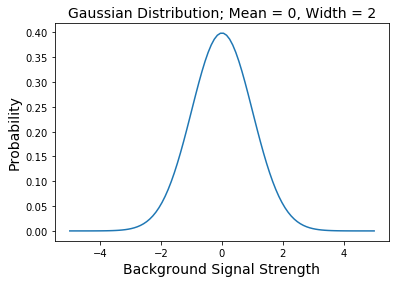

In [30]:
x = np.linspace(-5,5,100)
# create a pdf for a Gaussian distribution with mean = 0, width = 2
gaus_pdf = stats.norm.pdf(x, loc = 0, scale = 1)

# plot this gaussian distribution
plt.plot(x,gaus_pdf);
plt.title("Gaussian Distribution; Mean = 0, Width = 2", fontsize = 14)
plt.xlabel("Background Signal Strength", fontsize = 14);
plt.ylabel("Probability", fontsize = 14);

In [31]:
# Calculate the probability at candidate point x = 0.9
p = stats.norm.sf(0.9, loc = 0, scale = 1) # sf() is the survival function, it is defined as 1 - cdf
print("The probability that the background produced the signal at x = 0.9 is "+ str(p) + ", \n" +
        "and it is calculated by integrating the Gaussian distribution from the candidate x = 0.9 to positive infinity.")

The probability that the background produced the signal at x = 0.9 is 0.18406012534675947, 
and it is calculated by integrating the Gaussian distribution from the candidate x = 0.9 to positive infinity.


In [34]:
# convert the probability calculated above to sigma
sigma = stats.norm.ppf(p) # ppf() is the percent point function which is the inverse of cdf
print("The equivalent 'sigma' of probability = 0.18406012534675947 is " + str(abs(sigma)) + ".")

The equivalent 'sigma' of probability = 0.18406012534675947 is 0.9.


I can't claim a discovery with this observation because the significance of this detection of a signal of strength 0.9 in the Gaussian distribution above is about 0.9 sigma. Traditionally, people claim a discovery when they detect something that's 5 sigma or more. 0.9 sigma is less than 5 sigma. Therefore, I cannot claim a discovery.

### Version 2
### B) If you have to look for a signal in 10k pixels, what is the probability distribution of your background? (Clearly state the statistical question, then turn that into math using your background distribution from part 1 of this problem.)

The statistical question that's being asked is: Determine what the probability density function of the background is for 10k pixels.<br>
In the cell below, I will plot the probability distribution of the background for 10k pixels. The background distribution from part 1 is for 1 pixel. To get the probability distribution of the background for 10k pixels, I just need to multiply the y values in the plot above by 10k. 

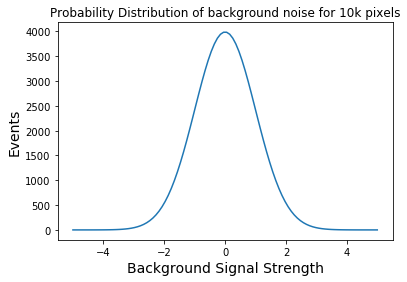

In [36]:
# plot the probability distribution of the background for 10k pixels
plt.plot(x,gaus_pdf*10000);
plt.title("Probability Distribution of background noise for 10k pixels");
plt.xlabel("Background Signal Strength", fontsize = 14);
plt.ylabel("Events", fontsize = 14);

### C) Taking your brightest candidate signal from the region (assume it has the same signal as in part 1), calculate the significance of your detection.

The brightest candidates in the two plots above (the original Gaussian Distribution plot and the Probability Distribution of background noise for 10k pixels plot) are both when x = 0. Therefore, we are going to calculate the significance of my detection x = 0, assuming it has the same signal as in part 1.

In [37]:
# Calculate the probability at candidate point x = 0.9
p_brightest = stats.norm.cdf(0, loc = 0, scale = 1) 
print("The probability that the background produced the signal at x = 0 is "+ str(p_brightest) + ", \n" +
        "and it is calculated by integrating the Gaussian distribution from negative infinity to the brightest candidate       signal x = 0.")

The probability that the background produced the signal at x = 0 is 0.5, 
and it is calculated by integrating the Gaussian distribution from negative infinity to the brightest candidate       signal x = 0.


In [24]:
# convert the probability calculated above to sigma
# convert the probability calculated above to sigma
sigma_brightest = stats.norm.ppf(p_brightest) # ppf() is the percent point function which is the inverse of cdf
print("The equivalent 'sigma' of probability = 0.5 is " + str(abs(sigma_brightest)) + ".")

The equivalent 'sigma' of probability = 0.5 is 0.0.


# Problem 4
### Let us again assume we have a Gaussian background (same parameters as Problem 3).
### A) Calculate the signal required for a 5-sigma detection in Version 1

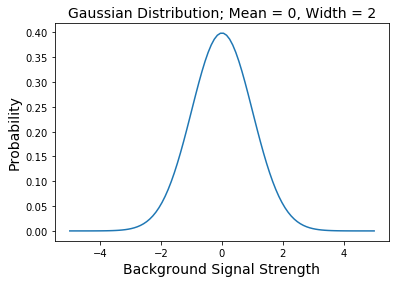

In [39]:
# plot the Gaussian background distribution from problem 3 here again
x = np.linspace(-5,5,100)
# create a pdf for a Gaussian distribution with mean = 0, width = 1
gaus_pdf = stats.norm.pdf(x, loc = 0, scale = 1)

# plot this gaussian distribution
plt.plot(x,gaus_pdf);
plt.title("Gaussian Distribution; Mean = 0, Width = 2", fontsize = 14)
plt.xlabel("Background Signal Strength", fontsize = 14);
plt.ylabel("Probability", fontsize = 14);

The plot above is the Gaussian background distribution we had in problem 3 version 1. Now I will calculate the signal required for a 5-sigma detection in this distribution below.

In [43]:
# Integrate the standard normal distribution using stats.norm.cdf() in scipy
# convert sigma to probability
p_v1 = stats.norm.cdf(5, loc = 0, scale = 1)

# loop through all x values in the plot above to find the max(abs(x)) that gives this probability
for i in x:
    px = stats.norm.sf(i, 0, 1) 
    if (px == p_v1): 
        signal_v1 = i
        
print("The signal required for a 5-sigma detection in Version 1 is " + str(abs(signal_v1)))

The signal required for a 5-sigma detection in Version 1 is 5.0


### B) Calculate the signal required for a 5-sigma detection in Version 2

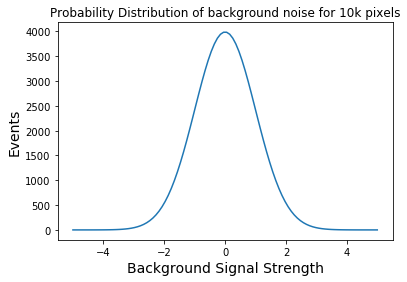

In [44]:
# plot the probability distribution of the background for 10k pixels here again
plt.plot(x,gaus_pdf*10000);
plt.title("Probability Distribution of background noise for 10k pixels");
plt.xlabel("Background Signal Strength", fontsize = 14);
plt.ylabel("Events", fontsize = 14);

The plot above is the Gaussian background distribution we had in problem 3 version 2. Now I will calculate the signal required for a 5-sigma detection in this distribution in the cell below.

In [45]:
# Integrate the standard normal distribution using stats.norm.cdf() in scipy
# convert sigma to probability
p_v1 = stats.norm.cdf(5, loc = 0, scale = 1)

# loop through all x values in the plot above to find the max(abs(x)) that gives this probability
for i in x:
    px = stats.norm.sf(i, 0, 1) 
    if (px == p_v1): 
        signal_v1 = i
        
print("The signal required for a 5-sigma detection in Version 1 is " + str(abs(signal_v1)))

The signal required for a 5-sigma detection in Version 1 is 5.0
